# Numerics for the SYK quantum batteries

let us start by including the relevant packages

In [1]:
include("/home/dario/Documents/ChargingPower/src/ChargingPower.jl")
using .ChargingPower

In [6]:
using SparseArrays
using KrylovKit
using ExponentialUtilities
using Graphs
using Plots
using Statistics

and let us set the parameters for the time evolution

In [7]:
min_t = 10^-1 
max_t = 10^3
number_of_points = 10^4
points = exp.(log(min_t):((log(max_t) - log(min_t)) / (number_of_points - 1)):log(max_t))

10000-element Vector{Float64}:
   0.10000000000000002
   0.10009215505167934
   0.10018439502889412
   0.10027672000990762
   0.10036913007305502
   0.10046162529674393
   0.10055420575945404
   0.10064687153973735
   0.1007396227162184
   0.1008324593675941
   ⋮
 992.6580753801127
 993.5728599424777
 994.488487525029
 995.4049589046521
 996.3222748589505
 997.240436166239
 998.1594436055545
 999.0792979566509
 999.9999999999998

## The Z-model charging power

Let us first collect the data for the Z-model battery

In [8]:
n_majorana = 14
n_samples = 1
samples_done = 0
average_power_list = zeros(Float64, length(points))

10000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [ ]:
power_single_size_list = Array{Float64}[] 
majorana_matrices = majorana_operators(n_majorana)
graph = complete_graph(n_majorana)
battery_hamiltonian = Z_model_hamiltonian(majorana_matrices)
for i in 1:n_samples 
    charging_hamiltonian = SYK_hamiltonian(majorana_matrices, graph)
    ground_state_rough = eigsolve(battery_hamiltonian, rand(ComplexF64, floor(Int, 2^(n_majorana/2))), 1, :SR)
    e_0 = real(ground_state_rough[1][1])
    ground_state = ground_state_rough[2][1]
    power_list = [0.0]
    for index in eachindex(points) 
        if index != length(points)
            ground_state = expv(- im * (points[index + 1] - points[index]), charging_hamiltonian, ground_state)
            push!(power_list, 2 * (real(ground_state' * battery_hamiltonian * ground_state) - e_0) / (points[index + 1] + points[index]))
        end
    end
    push!(power_single_size_list, power_list)
end
average_power_list = (samples_done .* average_power_list + mean(power_single_size_list)) / (samples_done + n_samples)


10000-element Vector{Float64}:
 0.0
 7.077663878316515e-7
 2.831066622328906e-6
 6.3699022935481645e-6
 1.1324276123567638e-5
 1.7694192268633794e-5
 2.547965577126655e-5
 3.468067287174779e-5
 4.529725095621641e-5
 5.7329398593144696e-5
 ⋮
 0.0053680154053373915
 0.004131410942925265
 0.004413420095186392
 0.005338185485067585
 0.0059788952694627
 0.007277986012833107
 0.007980299066904138
 0.006577806098957112
 0.007621038612004773

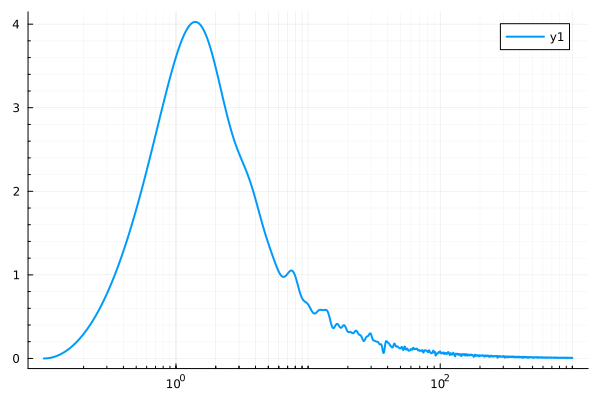

In [20]:
plot(points[2: length(points)], average_power_list[2: length(points)], xaxis=:log, linewidth=2, minorgrid=true)   